In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from recommender import matrix_factorization

In [2]:
## Dummy dataset
a = np.array([

     [5,3,0,1],

     [4,0,0,1],

     [1,1,0,5],

     [1,0,0,4],

     [0,1,5,4],
    
     [2,1,3,0],

    ])

In [5]:
mse = []
matrix_s = []
for k in range(1, 50, 1):
    r = matrix_factorization(a,k)
    r.fit(iterations=500)
    mse.append(np.mean(r.mse))
    matrix_s.append(r.matrix)

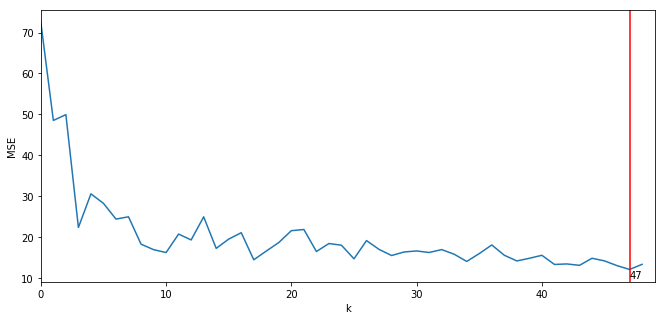

In [6]:
plt.figure(figsize=(11, 5))
plt.plot(mse)
plt.xlim(0,len(mse))
plt.xlabel("k")
plt.ylabel("MSE")
plt.axvline(np.argmin(mse), color = "r")
plt.annotate(f"{np.argmin(mse)}", xy=(np.argmin(mse),10))
plt.show()

In [11]:
## Best matrix with best k
matrix_s[np.argmin(mse)-1]

array([[5.55331122, 3.28946562, 0.57404319, 1.51951811],
       [4.45183836, 0.64910791, 0.47605826, 1.47997737],
       [1.50531666, 1.46511958, 0.52217762, 5.5009906 ],
       [1.48524218, 0.53643422, 0.5025722 , 4.4932028 ],
       [0.49583901, 1.56116935, 5.4472594 , 4.50118427],
       [2.50845257, 1.49870332, 3.47788932, 0.50512685]])

## EDA

In [ ]:
movies = pd.read_csv("https://raw.githubusercontent.com/carlosgeovany/MachineLearning/master/data/movies_metadata.csv", usecols=['id','title'])

In [ ]:
ratings = pd.read_csv("https://raw.githubusercontent.com/carlosgeovany/MachineLearning/master/data/ratings_small.csv")

In [ ]:
movies.head()

In [ ]:
movies.info()

In [ ]:
##Columns not needed
ratings.drop('timestamp', axis=1, inplace=True)

In [ ]:
## Order by movieId
ratings.sort_values('movieId', inplace=True)

In [ ]:
## Remove float ratings by casting to int
ratings['rating'] = ratings['rating'].astype(int)

In [ ]:
ratings.info()

In [ ]:
ratings.head()

In [ ]:
plt.figure(figsize = (11, 5))
sns.countplot(x="rating", data=ratings)
plt.tick_params(labelsize = 15)
plt.title("Count Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [ ]:
## Group by userid and count the numbers of movies rated by that user
ratings.groupby("userId")["rating"].count().sort_values(ascending = False).head()

In [ ]:
## Group by movies and count the number of users rated that movie
ratings.groupby("movieId")["rating"].count().sort_values(ascending = False).head()

In [ ]:
## set userId as index
ratings = ratings.set_index('userId').sort_index(axis = 0)

In [ ]:
ratings

In [ ]:
## pivot df to get the matrix Yai
ratings = ratings.pivot(index=ratings.index, columns='movieId')['rating']

In [ ]:
## replace NAN with zero
ratings = ratings.fillna(0)

In [ ]:
ratings

In [ ]:
## Transform pandas df to numnpy array
ratings_array = ratings.to_numpy()

In [ ]:
mse = []
for k in range(1, 2, 1):
    r = matrix_factorization(ratings_array,k)
    r.fit(iterations=0)
    mse.append(np.mean(r.mse))

In [ ]:
## Create the Recommender System object, set K
k=3
recomm = matrix_factorization(ratings_array,k)

In [ ]:
## Train the model
recomm.fit()

In [ ]:
## Get the Predicted matrix
recomm.matrix

In [ ]:
## Plot MSE over iterations
plt.figure(figsize=(11, 5))
plt.plot(recomm.mse)
plt.show()